In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
# convert csv to dataframe
data=pd.read_csv("df_cleaned1.csv")
data

,ownerNo,modelYear,price,Kms Driven,Mileage,Seats,Fuel type_Cng,Fuel type_Diesel,Fuel type_Electric,Fuel type_Lpg,...,Color_golden brown,Color_m grey,Color_magma gray,Color_urban titanim,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
0,3,2015,4.00,120000,23.10,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,2018,8.11,32706,17.00,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,2018,5.85,11949,23.84,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,2014,4.62,17794,19.10,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,2015,7.90,60000,23.65,5,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,1,2022,5.10,10000,25.24,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7436,1,2014,1.80,120000,22.74,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7437,3,2011,5.50,50000,11.74,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7438,1,2012,1.40,40000,18.50,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
x=data.drop(columns=["price"],axis=1)
y=data["price"]

In [4]:
# scaling the data with standardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(x)

In [5]:
import pickle
with open('std_scaler.pkl','wb') as f:
    pickle.dump(scaled,f)

In [6]:
# function to choose the best algorithm

def best_ML_algorithm(x,y,algorithms):
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

        results = []

        for algorithm in algorithms:

                model=algorithm().fit(x_train,y_train)
                y_pred=model.predict(x_test)
                MSE_1=mean_squared_error(y_test,y_pred)
                MAE_1=mean_absolute_error(y_test,y_pred)
                RMSE_1=np.sqrt(mean_squared_error(y_test,y_pred))
                r_squr_1=r2_score(y_test,y_pred)
                results.append({"model": type(model).__name__,
                                          "MAE": MAE_1,
                                          "MSE": MSE_1,
                                          "RMSE": RMSE_1,
                                           "R2": r_squr_1 })
                print(f"Trainscore: {model.score(x_train, y_train)}")
                print(f"Testscore: {model.score(x_test, y_test)}")
                # Plot Actual vs Predicted Prices
                plt.figure(figsize=(10, 6))
                sns.scatterplot(x=y_test, y=y_pred)
                plt.xlabel('Actual Prices')
                plt.ylabel('Predicted Prices')
                plt.title(f'{type(model).__name__}: Actual vs Predicted Prices')
                plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Add reference line
                plt.show()
        results_df = pd.DataFrame(results)
        
        return results_df   

Trainscore: 0.9000895122834176
Testscore: -1.0132254885180087e+27


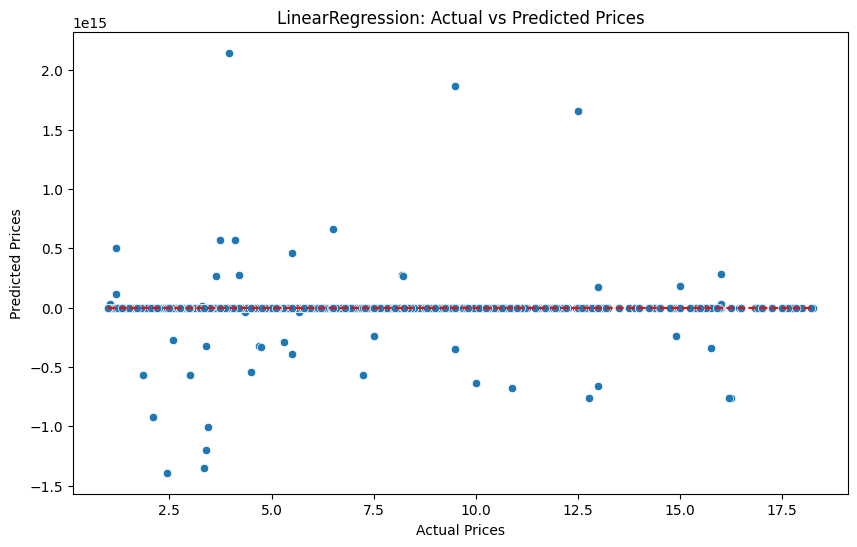

Trainscore: 0.9997161936718325
Testscore: 0.7867145690497299


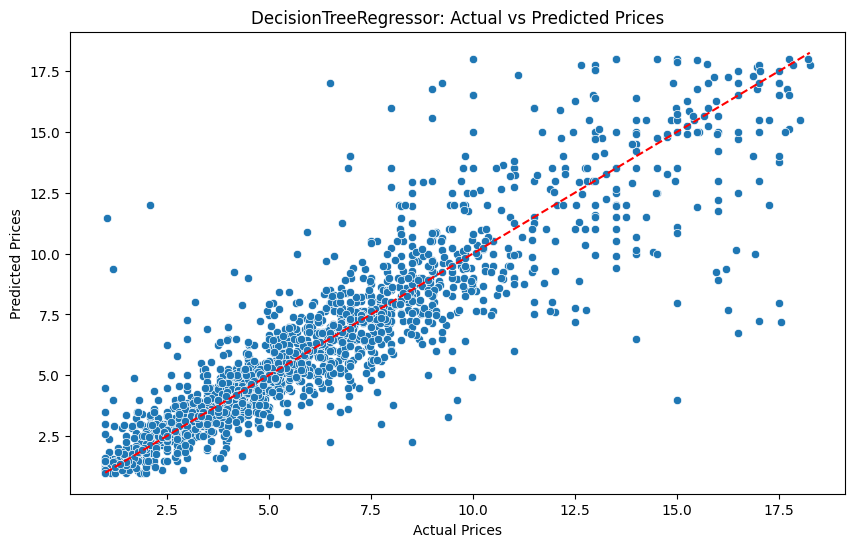

Trainscore: 0.9820337235290432
Testscore: 0.8813793237864648


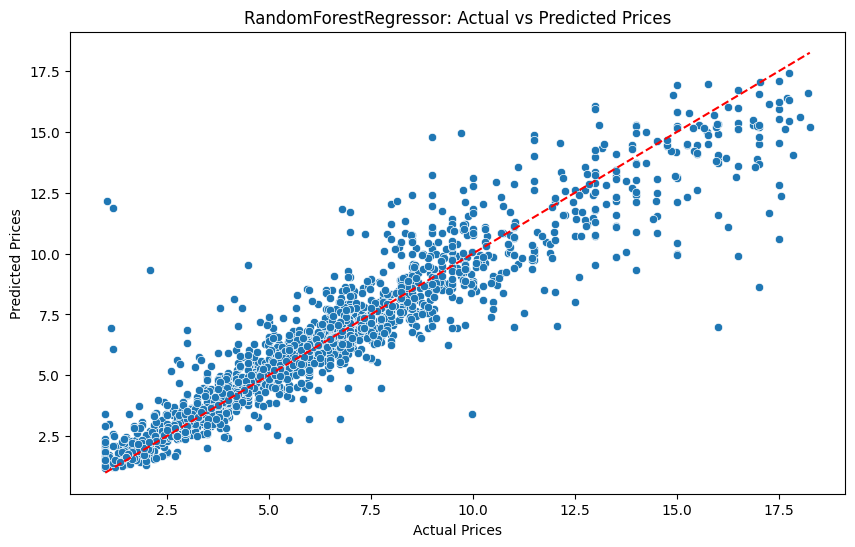

Trainscore: 0.8344679337923944
Testscore: 0.8013455020917162


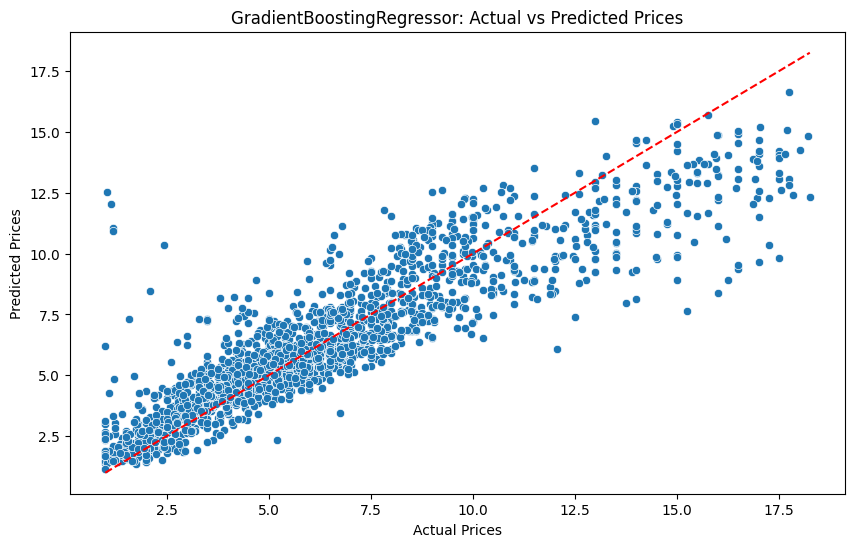

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


# using above function try to identify the best algorithm

algorithms = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor,GradientBoostingRegressor]

results_df = best_ML_algorithm(scaled,y, algorithms)

In [8]:
# model comparision
results_df

,model,MAE,MSE,RMSE,R2
0,LinearRegression,1.390867e+13,1.353861e+28,1.163555e+14,-1.013225e+27
1,DecisionTreeRegressor,1.032394e+00,2.849897e+00,1.688164e+00,7.867146e-01
2,RandomForestRegressor,7.822464e-01,1.584997e+00,1.258967e+00,8.813793e-01
3,GradientBoostingRegressor,1.135151e+00,2.654400e+00,1.629233e+00,8.013455e-01


### Lasso (L1) and Ridge (L2) Regularization

In [9]:
# using lasso to fit and evalutes the model
from sklearn.linear_model import Lasso
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=42)
alpha_values_L = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
values_L=[]
for i in alpha_values_L:
    LassoModel = Lasso(alpha=i, max_iter=10000)
    LassoModel.fit(X_train,Y_train)
    y_pred=LassoModel.predict(X_test)
    r_square=r2_score(Y_test,y_pred)
    values_L.append(r_square)
    
print(values_L)

[0.8297622516345982, 0.8217663968324782, 0.7540318896286637, 0.6299752348709682, 0.4121670245860116, -0.02132621139873203, -0.021005129195234895]


In [10]:
# best alpha values for prediction
best_alpha_lasso = alpha_values_L[np.argmax(values_L)]
LassoModel_1 = Lasso(alpha=best_alpha_lasso)
LassoModel_1.fit(X_train, Y_train)
y_pred_lasso=LassoModel_1.predict(X_test)

d:\MDE94\capstoneprojects\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.860e+03, tolerance: 7.522e+00
  model = cd_fast.enet_coordinate_descent(


In [11]:
# model evaluation
MSE_lasso=mean_squared_error(Y_test,y_pred_lasso)
MAE_lasso=mean_absolute_error(Y_test,y_pred_lasso)
RMSE_lasso=np.sqrt(mean_squared_error(Y_test,y_pred_lasso))
r_square_lasso=r2_score(Y_test,y_pred_lasso)

In [12]:
# create dataframe to view above evaluation metrics
lasso=pd.DataFrame({"model":"LassoRegressor","MAE":[MSE_lasso],"MSE":[MAE_lasso],"RMSE":[RMSE_lasso],"R2":r_square_lasso})
lasso

,model,MAE,MSE,RMSE,R2
0,LassoRegressor,2.276427,0.92328,1.508783,0.829633


In [13]:
# using ridge to fit and evalutes the model
from sklearn.linear_model import Ridge
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
values=[]
for i in alpha_values:
    ridgeModel = Ridge(alpha=i , max_iter=10000)
    ridgeModel.fit(X_train,Y_train)
    y_pred=ridgeModel.predict(X_test)
    r_square=r2_score(Y_test,y_pred)
    values.append(r_square)
    
print(values)

d:\MDE94\capstoneprojects\.venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.10667e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
d:\MDE94\capstoneprojects\.venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.10744e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[0.835282858311389, 0.8353116033150936, 0.8355419880407744, 0.8363607456234305, 0.8334624650700341, 0.8099395687385992, 0.747579157226392]


In [14]:
# best alpha values for prediction
best_alpha_ridge = alpha_values[np.argmax(values)]
ridgeModel_1 = Ridge(alpha=best_alpha_ridge)
ridgeModel_1.fit(X_train, Y_train)
y_pred_ridge=ridgeModel_1.predict(X_test)

In [15]:
# model evaluation
MSE_ridge=mean_squared_error(Y_test,y_pred_ridge)
MAE_ridge=mean_absolute_error(Y_test,y_pred_ridge)
RMSE_ridge=np.sqrt(mean_squared_error(Y_test,y_pred_ridge))
r_square_ridge=r2_score(Y_test,y_pred_ridge)

In [16]:
# create dataframe to view above evaluation metrics
ridge=pd.DataFrame({"model":"RidgeRegressor","MAE":[MSE_ridge],"MSE":[MAE_ridge],"RMSE":[RMSE_ridge],"R2":r_square_ridge})
ridge

,model,MAE,MSE,RMSE,R2
0,RidgeRegressor,2.18653,0.924698,1.478692,0.836361


In [17]:
# Find the model with the highest R² score 
best_model_df = pd.concat([results_df,ridge,lasso], ignore_index=True)
best_model_df

,model,MAE,MSE,RMSE,R2
0,LinearRegression,1.390867e+13,1.353861e+28,1.163555e+14,-1.013225e+27
1,DecisionTreeRegressor,1.032394e+00,2.849897e+00,1.688164e+00,7.867146e-01
2,RandomForestRegressor,7.822464e-01,1.584997e+00,1.258967e+00,8.813793e-01
3,GradientBoostingRegressor,1.135151e+00,2.654400e+00,1.629233e+00,8.013455e-01
4,RidgeRegressor,2.186530e+00,9.246984e-01,1.478692e+00,8.363607e-01
5,LassoRegressor,2.276427e+00,9.232800e-01,1.508783e+00,8.296329e-01


In [18]:
best_model = best_model_df.loc[best_model_df['R2'].idxmax()]
print("Best model with high r2 score")
best_model

Best model with high r2 score


model    RandomForestRegressor
MAE                   0.782246
MSE                   1.584997
RMSE                  1.258967
R2                    0.881379
Name: 2, dtype: object

### Hyperameter Tuning

In [19]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 
    'n_estimators' : [100, 150, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False] 
}

In [20]:
# tuning the model using grid search cv
grid_tuning=RandomizedSearchCV(estimator=RandomForestRegressor(),
                            param_distributions=param_grid, cv=5, n_jobs=-1)

grid_tuning.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 150, 200, 300]})

In [21]:
grid_tuning.best_params_,grid_tuning.best_score_

({'n_estimators': 150,
  'min_samples_split': 10,
  'min_samples_leaf': 1,
  'max_features': None,
  'max_depth': 20,
  'bootstrap': False},
 np.float64(0.7997060407219889))

In [22]:
# final model fit and prediction
final_model=RandomForestRegressor(n_estimators=200,max_features=None,max_depth=20,min_samples_leaf=4,
                                  min_samples_split=5,random_state=42)

final_model.fit(X_train,Y_train)

#Model evaluation
y_pred_final=final_model.predict(X_test)
MSE_final=mean_squared_error(Y_test,y_pred_final)
MAE_final=mean_absolute_error(Y_test,y_pred_final)
RMSE_final=np.sqrt(mean_squared_error(Y_test,y_pred_final))
r_square_final=r2_score(Y_test,y_pred_final)

print(f"Trainscore: {final_model.score(X_train, Y_train)}")
print(f"Testscore: {final_model.score(X_test, Y_test)}")

# create dataframe to view above evaluation metrics
rf_1=pd.DataFrame({"model":"RandomForestRegressor","MAE":[MAE_final],"MSE":[MSE_final],"RMSE":[RMSE_final],"R2":r_square_final})
rf_1

Trainscore: 0.9280094745230792
Testscore: 0.852366828762749


,model,MAE,MSE,RMSE,R2
0,RandomForestRegressor,0.874612,1.972659,1.404514,0.852367


In [23]:
import pickle
# pickling the model

with open('model.pkl','wb') as files:
    pickle.dump(final_model,files)

In [24]:
# loading the model,scaler and encoder
with open('model.pkl','rb') as files:
    final_model=pickle.load(files)

with open('std_scaler.pkl','rb') as f:
    scaled=pickle.load(f)

with open('encoder.pkl','rb') as file:
    encoder=pickle.load(file)

In [25]:
import sklearn
print(sklearn.__version__)


1.5.2


### Pipeline

In [26]:
#read final csv file
df1=pd.read_csv("df.csv")
df1

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.10,5,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,17.00,5,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,23.84,5,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,19.10,5,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,23.65,5,Gray,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,Petrol,Hatchback,Manual,1,Maruti,Maruti Celerio,2022,5.10,Third Party insurance,10000,25.24,5,Others,Kolkata
8355,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto 800,2014,1.80,Third Party insurance,120000,22.74,5,Others,Kolkata
8356,Petrol,Sedan,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,5.50,Third Party insurance,50000,11.74,5,Others,Kolkata
8357,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2012,1.40,Third Party insurance,40000,18.50,5,Others,Kolkata


In [27]:
df1.dtypes

Fuel type              object
body type              object
transmission           object
ownerNo                 int64
Brand                  object
model                  object
modelYear               int64
price                 float64
Insurance Validity     object
Kms Driven              int64
Mileage               float64
Seats                   int64
Color                  object
City                   object
dtype: object

In [28]:
'''

# Splitting data into features and target
x_df = df1.drop(columns=["price"], axis=1)
y_df = df1["price"]

# Splitting into training and testing sets
x_df_train, x_df_test, y_df_train, y_df_test = train_test_split(x_df, y_df, random_state=42)

# Define the categorical and numerical columns
num = x_df.select_dtypes(include=["int", "float"]).columns.to_list()
cat = x_df.select_dtypes(include=["object"]).columns.to_list()

# Define the preprocessing steps
cat_preprocessor = Pipeline(steps=[
    ("categorical", encoder)
])
num_preprocessor = Pipeline(steps=[
    ("numerical", scaler)
])

# Compose preprocessing techniques
preprocessor = ColumnTransformer(transformers=[
    ("num", num_preprocessor, num),
    ("cat", cat_preprocessor, cat)
])

# Define the pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

# Fit with the dataframe
pipeline.fit(x_df_train, y_df_train)

# Checking the pipeline
print(pipeline)
'''

'\n\n# Splitting data into features and target\nx_df = df1.drop(columns=["price"], axis=1)\ny_df = df1["price"]\n\n# Splitting into training and testing sets\nx_df_train, x_df_test, y_df_train, y_df_test = train_test_split(x_df, y_df, random_state=42)\n\n# Define the categorical and numerical columns\nnum = x_df.select_dtypes(include=["int", "float"]).columns.to_list()\ncat = x_df.select_dtypes(include=["object"]).columns.to_list()\n\n# Define the preprocessing steps\ncat_preprocessor = Pipeline(steps=[\n    ("onehot", encoder)\n])\nnum_preprocessor = Pipeline(steps=[\n    ("scaler", scaler)\n])\n\n# Compose preprocessing techniques\npreprocessor = ColumnTransformer(transformers=[\n    ("num", num_preprocessor, num),\n    ("cat", cat_preprocessor, cat)\n])\n\n# Define the pipeline\npipeline = Pipeline(steps=[\n    ("preprocessor", preprocessor),\n    ("model", model)\n])\n\n# Fit with the dataframe\npipeline.fit(x_df_train, y_df_train)\n\n# Checking the pipeline\nprint(pipeline)\n'

In [29]:
# x and y data splitting
x_df=df1.drop(columns=["price"],axis=1)
y_df=df1["price"]

In [30]:
x_df_train,x_df_test,y_df_train,y_df_test=train_test_split(x_df,y_df,random_state=42)

In [31]:
# building pipeline for categorical and numerical data
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

num=x_df.select_dtypes(include=["int","float"]).columns.to_list()
cat=x_df.select_dtypes(include=["object"]).columns.to_list()

cat_preprocessor=Pipeline(steps=[("categorical",encoder)])
num_preprocessor=Pipeline(steps=[("numerical",scaler)])
print(num)
print(cat)
print(cat_preprocessor)
print(num_preprocessor)

['ownerNo', 'modelYear', 'Kms Driven', 'Mileage', 'Seats']
['Fuel type', 'body type', 'transmission', 'Brand', 'model', 'Insurance Validity', 'Color', 'City']
Pipeline(steps=[('categorical',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
Pipeline(steps=[('numerical', StandardScaler())])


In [32]:
# compose preprocessing techniques
preprocessor=ColumnTransformer(transformers=[("categorical",cat_preprocessor,cat),
                                ("numerical",num_preprocessor,num)])
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Fuel type', 'body type', 'transmission',
                                  'Brand', 'model', 'Insurance Validity',
                                  'Color', 'City']),
                                ('numerical',
                                 Pipeline(steps=[('numerical',
                                                  StandardScaler())]),
                                 ['ownerNo', 'modelYear', 'Kms Driven',
                                  'Mileage', 'Seats'])])

In [33]:
preprocessor.fit(x_df)

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Fuel type', 'body type', 'transmission',
                                  'Brand', 'model', 'Insurance Validity',
                                  'Color', 'City']),
                                ('numerical',
                                 Pipeline(steps=[('numerical',
                                                  StandardScaler())]),
                                 ['ownerNo', 'modelYear', 'Kms Driven',
                                  'Mileage', 'Seats'])])

In [34]:
#construct pipeline to combine preprocessor and model
pipeline=Pipeline(steps=[("preprocessing",preprocessor),
                   ("model",final_model)])
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('categorical',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Fuel type', 'body type',
                                                   'transmission', 'Brand',
                                                   'model',
                                                   'Insurance Validity',
                                                   'Color', 'City']),
                                                 ('numerical',
                                                  Pipeline(steps=[('numerical',
                                                                   StandardScaler())]),
                                                  ['ownerNo', 'modelYear',
                                                   'Kms Driven', 'Mileage',
                                                   'Seats'])])),
                ('model',
                 RandomForestRegressor(max_depth=20, max_features=None,
                                       min_samples_leaf=4, min_samples_split=5,
                                       n_estimators=200, random_state=42))])

In [35]:
# fit with dataframe
pipeline.fit(x_df_train,y_df_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('categorical',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Fuel type', 'body type',
                                                   'transmission', 'Brand',
                                                   'model',
                                                   'Insurance Validity',
                                                   'Color', 'City']),
                                                 ('numerical',
                                                  Pipeline(steps=[('numerical',
                                                                   StandardScaler())]),
                                                  ['ownerNo', 'modelYear',
                                                   'Kms Driven', 'Mileage',
                                                   'Seats'])])),
                ('model',
                 RandomForestRegressor(max_depth=20, max_features=None,
                                       min_samples_leaf=4, min_samples_split=5,
                                       n_estimators=200, random_state=42))])

In [36]:
# evaluate the pipeline 
y_prediction=pipeline.predict(x_df_test)

MSE_pipe=mean_squared_error(y_df_test,y_prediction)

MAE_pipe=mean_absolute_error(y_df_test,y_prediction)

RMSE_pipe=np.sqrt(mean_squared_error(y_df_test,y_prediction))

r_square_pipe=r2_score(y_df_test,y_prediction)

# create dataframe to view above evaluation metrics
Rf_Pipe=pd.DataFrame({"model":"RandomForestRegressor","MAE":[MAE_pipe],"MSE":[MSE_pipe],"RMSE":[RMSE_pipe],"R2":r_square_pipe})
Rf_Pipe

,model,MAE,MSE,RMSE,R2
0,RandomForestRegressor,2.540157,51.852591,7.200874,0.641718


In [37]:
x_df.columns

Index(['Fuel type', 'body type', 'transmission', 'ownerNo', 'Brand', 'model',
       'modelYear', 'Insurance Validity', 'Kms Driven', 'Mileage', 'Seats',
       'Color', 'City'],
      dtype='object')

In [38]:
x_df["Brand"].unique()

array(['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
       'Mahindra', 'Mercedes-Benz', 'BMW', 'Renault', 'Audi', 'Toyota',
       'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'MG', 'Nissan',
       'Fiat', 'Mahindra Ssangyong', 'Mitsubishi', 'Jaguar', 'Land Rover',
       'Chevrolet', 'Citroen', 'Opel', 'Mahindra Renault', 'Isuzu',
       'Lexus', 'Porsche', 'Hindustan Motors'], dtype=object)

In [39]:
df1[df1["price"]>45]

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
16,Diesel,SUV,Automatic,1,Mercedes-Benz,Mercedes-Benz GLA,2022,55.95,Comprehensive,16000,19.245568,5,Blue,Bangalore
24,Petrol,Sedan,Automatic,2,Mercedes-Benz,Mercedes-Benz S-Class,2016,49.00,Third Party insurance,50000,7.810000,5,Others,Bangalore
38,Petrol,Sedan,Automatic,1,BMW,BMW 5 Series,2020,49.65,Zero Dep,18157,15.560000,5,Blue,Bangalore
52,Diesel,Sedan,Automatic,1,Mercedes-Benz,Mercedes-Benz E-Class,2022,79.90,Third Party,400,19.245568,5,White,Bangalore
93,Diesel,Sedan,Automatic,2,Mercedes-Benz,Mercedes-Benz E-Class,2018,59.90,Comprehensive,24000,17.000000,5,White,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8086,Lpg,Hatchback,Manual,2,Maruti,Maruti Wagon R,2009,65.00,Third Party insurance,120000,17.300000,5,Silver,Kolkata
8106,Petrol,Convertibles,Automatic,3,Jaguar,Jaguar F-TYPE,2014,64.00,Comprehensive,31828,15.150000,2,Orange,Kolkata
8232,Diesel,Sedan,Automatic,1,Mercedes-Benz,Mercedes-Benz E-Class,2020,55.41,Comprehensive,20000,16.100000,5,Grey,Kolkata
8300,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2009,75.00,Third Party insurance,50000,21.100000,5,Others,Kolkata


In [40]:
df1.loc[24]

Fuel type                            Petrol
body type                             Sedan
transmission                      Automatic
ownerNo                                   2
Brand                         Mercedes-Benz
model                 Mercedes-Benz S-Class
modelYear                              2016
price                                  49.0
Insurance Validity    Third Party insurance
Kms Driven                            50000
Mileage                                7.81
Seats                                     5
Color                                Others
City                              Bangalore
Name: 24, dtype: object

In [41]:
x_df[x_df["Brand"]=="BMW"]

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
20,Diesel,Sedan,Automatic,3,BMW,BMW 5 Series,2011,Third Party insurance,100000,18.48,5,White,Bangalore
38,Petrol,Sedan,Automatic,1,BMW,BMW 5 Series,2020,Zero Dep,18157,15.56,5,Blue,Bangalore
72,Diesel,Sedan,Automatic,1,BMW,BMW 3 Series GT,2016,Comprehensive,40525,21.76,5,White,Bangalore
88,Diesel,SUV,Automatic,2,BMW,BMW X3,2016,Comprehensive,92000,16.55,5,White,Bangalore
116,Diesel,Sedan,Automatic,2,BMW,BMW 3 Series,2008,Third Party insurance,80000,13.20,5,Others,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7930,Diesel,Sedan,Automatic,3,BMW,BMW 6 Series,2018,Comprehensive,44226,17.09,4,White,Kolkata
8133,Diesel,Sedan,Automatic,2,BMW,BMW 3 Series,2015,Third Party insurance,70000,18.88,5,Blue,Kolkata
8140,Petrol,Sedan,Automatic,3,BMW,BMW 3 Series,2010,Third Party insurance,20000,12.05,5,Others,Kolkata
8271,Diesel,Sedan,Automatic,1,BMW,BMW 3 Series,2018,Comprehensive,23000,22.69,5,Blue,Kolkata


In [42]:
df1.iloc[50]

Fuel type                    Petrol
body type                       SUV
transmission              Automatic
ownerNo                           2
Brand                           Kia
model                    Kia Seltos
modelYear                      2020
price                         16.75
Insurance Validity    Comprehensive
Kms Driven                    33539
Mileage                        16.5
Seats                             5
Color                         White
City                      Bangalore
Name: 50, dtype: object

### Prediction

In [43]:
# New data to predict car price
new_data=pd.DataFrame({
    'Fuel type':'Petrol',
    'body type':'SUV',
    'transmission':'Automatic',
    'ownerNo':2,
    'Brand':'Kia',
    'model':'Kia Seltos',
    'modelYear':2020,
    'Insurance Validity': 'Comprehensive',
    'Kms Driven':33539,
    'Mileage':16.5,
    'Seats':5,
    'Color':'White',
    'City':'Bangalore'
},index=[0])
new_data

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
0,Petrol,SUV,Automatic,2,Kia,Kia Seltos,2020,Comprehensive,33539,16.5,5,White,Bangalore


In [44]:
# FINAL MODEL PREDICTION 
prediction=pipeline.predict(new_data)
print(f"The price of the {new_data['Brand'].iloc[0]} car is: {round(prediction[0],2)} lakhs")

The price of the Kia car is: 15.98 lakhs


In [45]:
# save the pipeline in pickle

with open('pipeline.pkl','wb') as files:
    pickle.dump(pipeline,files)